In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
file_path = 'insurance.csv'
data = pd.read_csv(file_path)

# Informações do dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
# 5 Primeiras linhas do dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# Descrição do dataset (estatistica)
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


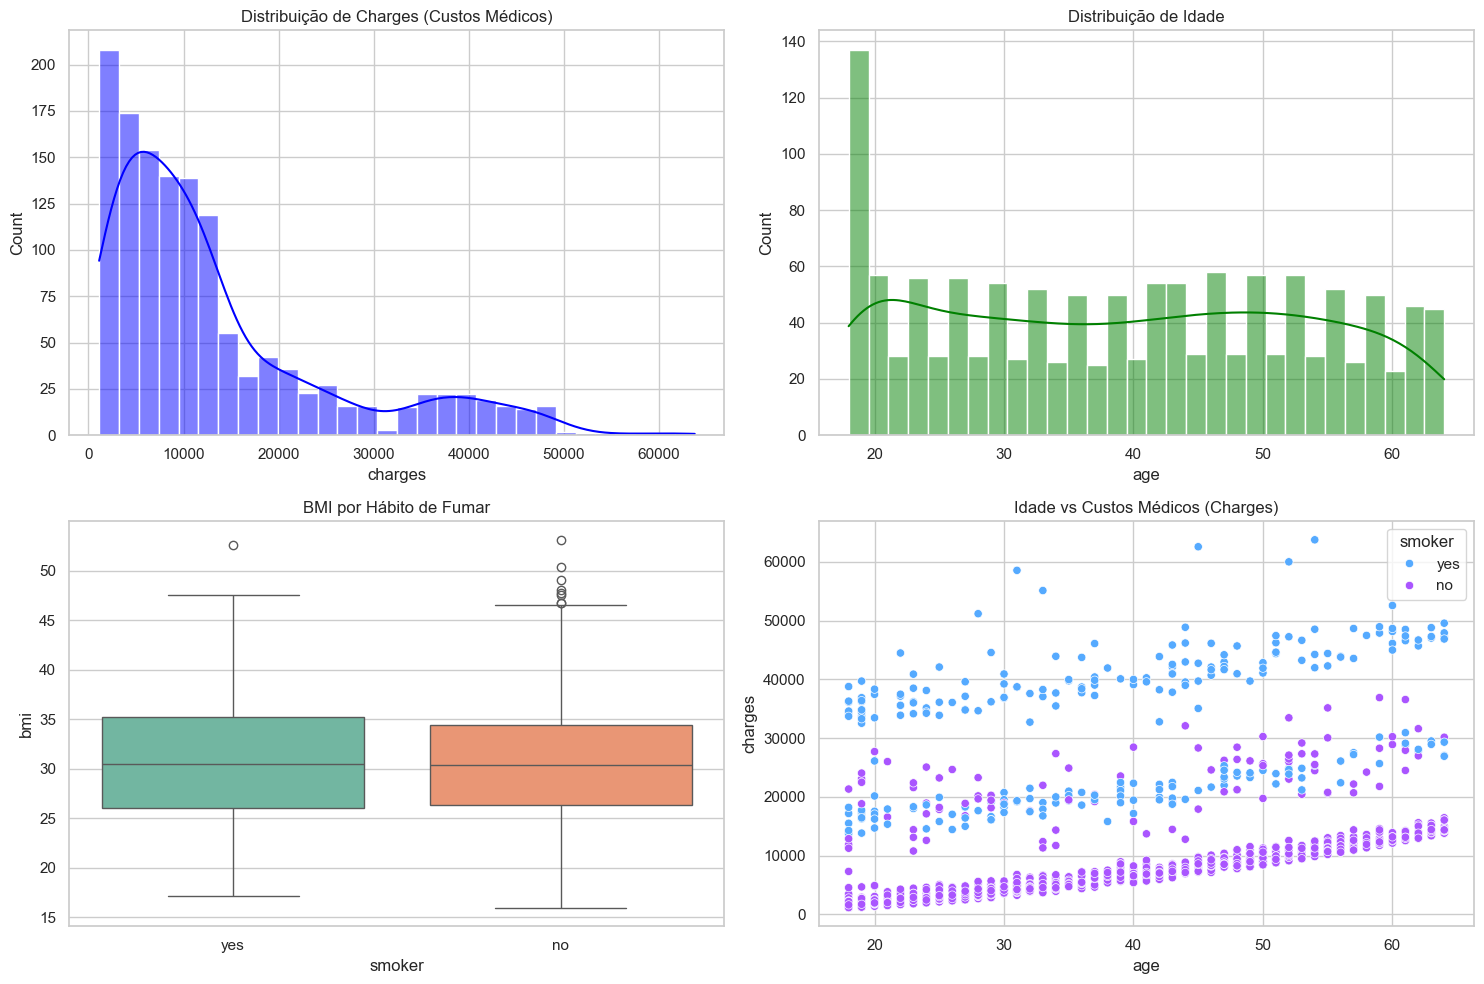

In [29]:
# Visualização de Dados
def plot_visualizations(data):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(15, 10))

    # Distribuição de Charges
    plt.subplot(2, 2, 1)
    sns.histplot(data["charges"], kde=True, bins=30, color="blue")
    plt.title("Distribuição de Charges (Custos Médicos)")

    # Distribuição de Idade
    plt.subplot(2, 2, 2)
    sns.histplot(data["age"], kde=True, bins=30, color="green")
    plt.title("Distribuição de Idade")

    # Boxplot: BMI por hábito de fumar
    plt.subplot(2, 2, 3)
    sns.boxplot(x="smoker", y="bmi", hue="smoker", data=data, palette="Set2", dodge=False)
    plt.title("BMI por Hábito de Fumar")

    # Scatterplot: Idade vs Charges
    plt.subplot(2, 2, 4)
    sns.scatterplot(x="age", y="charges", hue="smoker", data=data, palette="cool")
    plt.title("Idade vs Custos Médicos (Charges)")

    plt.tight_layout()
    plt.show()

plot_visualizations(data)



In [30]:
X = data.drop(columns=["charges"])
y = data["charges"]


In [31]:
categorical_columns = ["sex", "smoker", "region"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

X_numerical = X.drop(columns=categorical_columns).reset_index(drop=True)
X_preprocessed = pd.concat([X_encoded_df, X_numerical], axis=1)



In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

# Acessando os coeficientes do modelo treinado
print("Coeficientes do modelo:")
print(model.coef_)

# Acessando o intercepto (constante) do modelo
print("Intercepto (constante) do modelo:")
print(model.intercept_)


Coeficientes do modelo:
[-9.29533694e+00  9.54425109e+03 -1.58959435e+02 -2.92759080e+02
 -3.47270359e+02  3.60914902e+03  2.05488506e+03  5.12478869e+02]
Intercepto (constante) do modelo:
13314.335941867355


In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nAvaliação do modelo:")
print(f"Erro Médio Quadrático (Treino): {train_mse:.2f}")
print(f"Erro Médio Quadrático (Teste): {test_mse:.2f}")
print(f"R² (Treino): {train_r2:.2f}")
print(f"R² (Teste): {test_r2:.2f}")



Avaliação do modelo:
Erro Médio Quadrático (Treino): 37277681.70
Erro Médio Quadrático (Teste): 33596915.85
R² (Treino): 0.74
R² (Teste): 0.78


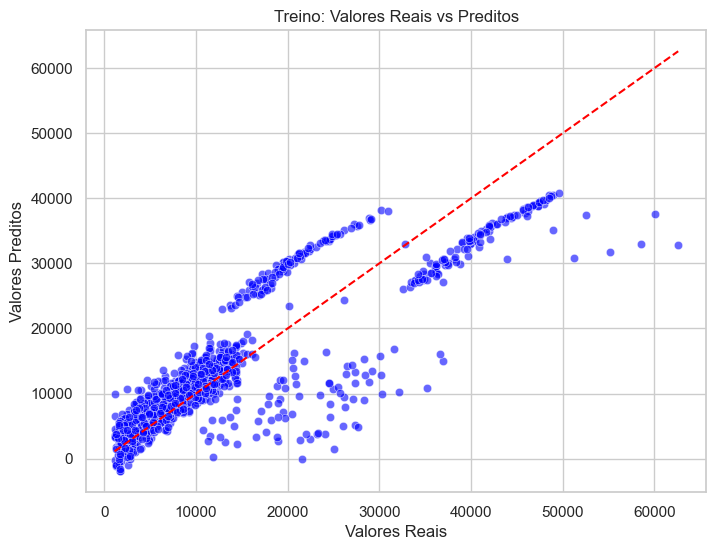

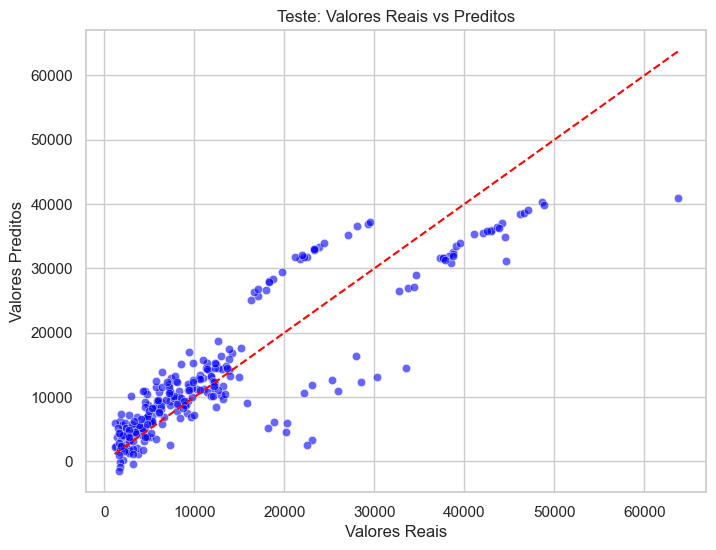

In [36]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red')
    plt.title(title)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.show()

plot_predictions(y_train, y_train_pred, "Treino: Valores Reais vs Preditos")
plot_predictions(y_test, y_test_pred, "Teste: Valores Reais vs Preditos")
